<a href="https://colab.research.google.com/github/Hamdan070905/Code-alpha-ML-Task-1/blob/main/ML_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc


In [56]:
df = pd.read_csv('credit_score.csv')
df
df.head()



,income,debt_ratio,credit_utilization,age,open_credit_lines,late_payments,real_estate_loans,dependents,default
0,0.243847,-0.164471,-0.705182,-0.015433,-0.078425,0.730461,0.363777,0.727296,0
1,0.650237,0.274936,-0.776536,-0.959132,-1.123291,-0.572504,-0.918580,0.073886,0
2,-3.390672,-0.590640,-1.343470,6.169133,1.222753,1.439649,-1.715076,3.223089,1
3,0.064793,-0.032960,-0.723131,-1.063065,-0.201072,-0.770711,0.890636,-1.379626,1
4,0.438060,-0.914989,0.953398,-0.033631,-0.048063,-0.860909,0.511169,-0.449294,0


In [55]:
print(df.isnull().sum())

df.dropna(inplace=True)

print(df.info())
print(df.describe())

df = pd.get_dummies(df, drop_first=True)

X, y = make_classification(n_samples=1000, n_features=8, n_informative=5,
                           n_redundant=2, random_state=42)

columns = ['income', 'debt_ratio', 'credit_utilization', 'age',
           'open_credit_lines', 'late_payments', 'real_estate_loans', 'dependents']
df = pd.DataFrame(X, columns=columns)
df['default'] = y



income                0
debt_ratio            0
credit_utilization    0
age                   0
open_credit_lines     0
late_payments         0
real_estate_loans     0
dependents            0
default               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   income              1000 non-null   float64
 1   debt_ratio          1000 non-null   float64
 2   credit_utilization  1000 non-null   float64
 3   age                 1000 non-null   float64
 4   open_credit_lines   1000 non-null   float64
 5   late_payments       1000 non-null   float64
 6   real_estate_loans   1000 non-null   float64
 7   dependents          1000 non-null   float64
 8   default             1000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 70.4 KB
None
            income   debt_ratio  credit_utilization          age  \
cou

In [58]:
X = df.drop('debt_ratio', axis=1)
y = df['debt_ratio']
print(X.shape)
print(y.shape)

(1000, 8)
(1000,)


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 8)
(200, 8)
(800,)
(200,)


In [60]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [61]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
print(classification_report(y_test, log_preds))
print(confusion_matrix(y_test, log_preds))

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)
print(classification_report(y_test, tree_preds))
print(confusion_matrix(y_test, tree_preds))

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         3
          -2       0.73      0.31      0.43        26
          -1       0.74      0.91      0.82        56
           0       0.79      1.00      0.88        76
           1       0.22      0.11      0.15        18
           2       0.60      0.30      0.40        10
           3       0.44      0.50      0.47         8
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1

    accuracy                           0.72       200
   macro avg       0.39      0.35      0.35       200
weighted avg       0.67      0.72      0.67       200

[[ 0  3  0  0  0  0  0  0  0]
 [ 0  8 18  0  0  0  0  0  0]
 [ 1  0 51  4  0  0  0  0  0]
 [ 0  0  0 76  0  0  0  0  0]
 [ 0  0  0 16  2  0  0  0  0]
 [ 0  0  0  0  5  3  2  0  0]
 [ 0  0  0  0  2  2  4  0  0]
 [ 0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  1  0  0]]
              precision 

In [62]:
def evaluate_model(name, model, X_test, y_test, y_pred):
    print(f"\n🔹 {name}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Use predicted probabilities (only for binary class 1)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
        print("ROC AUC Score:", roc_auc)
    else:
        print("Model does not support probability predictions for ROC AUC.")


In [63]:
def plot_roc_curve(model, X_test, y_test, label):
    try:
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_proba)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.2f})")
        else:
            print(f"Model '{label}' does not support predict_proba.")
    except ValueError as e:
        print(f"Error plotting ROC for {label}: {e}")


Error plotting ROC for Logistic Regression: multiclass format is not supported
Error plotting ROC for Decision Tree: multiclass format is not supported
Error plotting ROC for Random Forest: multiclass format is not supported


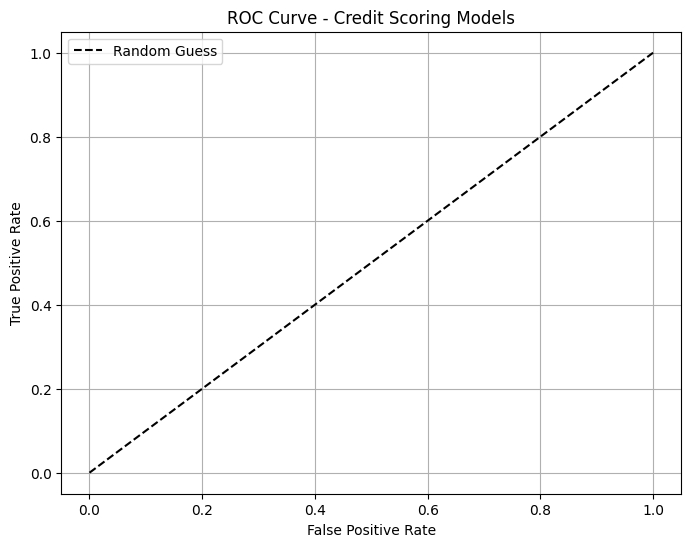

In [64]:
plt.figure(figsize=(8, 6))

plot_roc_curve(log_model, X_test, y_test, "Logistic Regression")
plot_roc_curve(tree_model, X_test, y_test, "Decision Tree")
plot_roc_curve(rf_model, X_test, y_test, "Random Forest")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Credit Scoring Models")
plt.legend()
plt.grid(True)
plt.show()
